In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from nuflux import detgeo
from nuflux import data

In [2]:
mdb = data.get_particles("mutristan_small")

In [3]:
geom = "approximate_muon_detector_0"
Nmu = 2.89e19
iterations = 7
particle = 'both'
parameters = {"geom": geom, "Nmu": Nmu, "iterations": iterations, "particle": particle}

In [4]:
cc = detgeo.get_quantities(mdb)
_=cc.completely_circular()

In [5]:
sim, sim2 = detgeo.SimulateDetector(cc, parameters).run()

/home/luc/Research/BIN_MC/nuflux/detector_geometries/helpers.py:57: ComplexWarning: Casting complex values to real discards the imaginary part
  roots[i,:] = root# (indices size, 2) THIS MIGHT NOT ALWAYS have size two


3.87e+09 numu events
6.45e+09 nue events


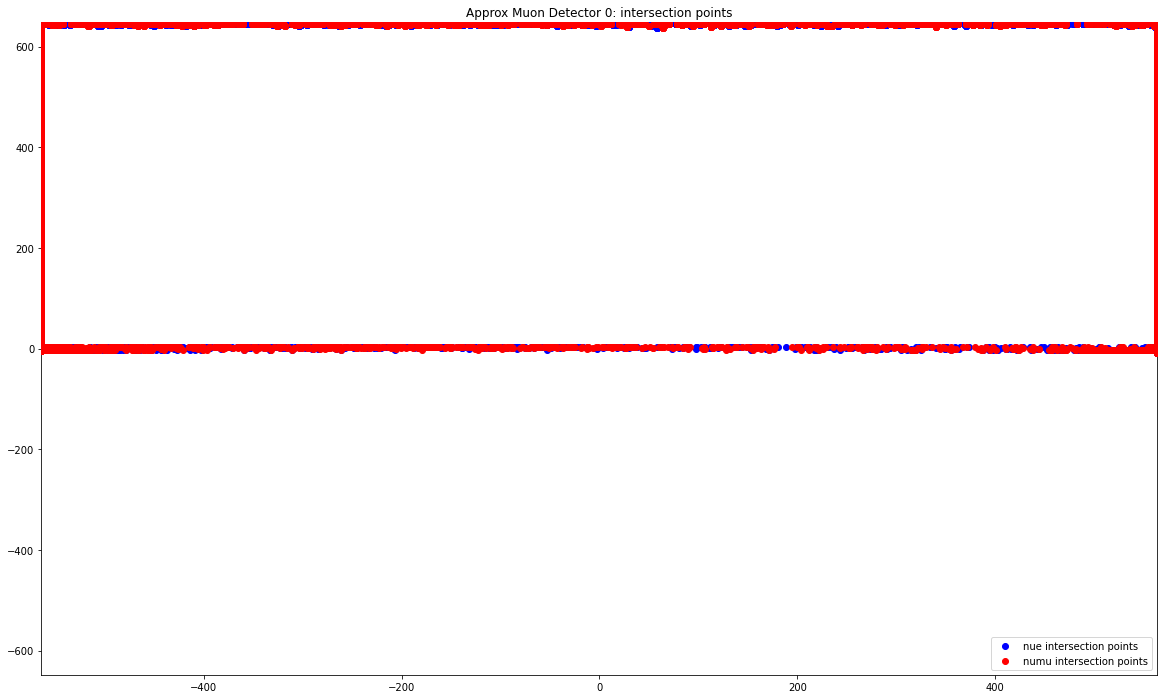

In [18]:
particle = -1
arr = sim.intersection_points[sim.mask]
arr2 = sim2.intersection_points[sim2.mask]
#plt.scatter(arr[particle, :,2], np.sqrt(arr[particle,:,1]**2 + arr[particle, :, 0]**2), alpha = 1, zorder = 10)
plt.figure(figsize = (20,12))
plt.scatter(arr[:, 1:,2], arr[:,1:,1], alpha = 1, zorder = 10, c = 'blue', label ='nue intersection points')
plt.scatter(arr2[:, 1:,2], arr2[:,1:,1], alpha = 1, zorder = 10,c ='red', label = 'numu intersection points')
plt.xlim(-564, right=564)
plt.ylim(-648, 648)
plt.legend(loc ='lower right')
plt.title("Approx Muon Detector 0: intersection points")
plt.savefig("plots_Luc/approx_detector_0_intersection_points.jpg", bbox_inches='tight', dpi=300)

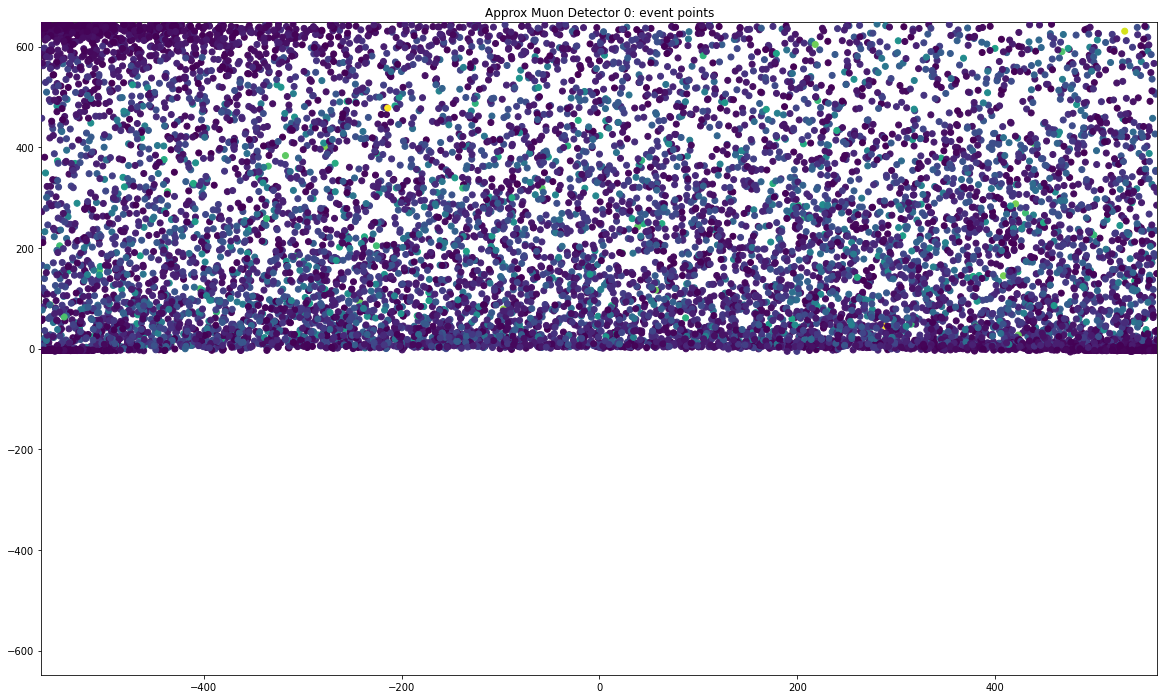

In [19]:
plt.figure(figsize=(20,12))
plt.xlim(-564, right=564)
plt.ylim(-648, 648)
arr = sim.events_position[sim.mask]
arr2= sim2.events_position[sim2.mask]
mask = (sim.part_face_counts[sim.mask][:,:] > 0)
mask2 = (sim.part_face_counts[sim2.mask][:,:] > 0)
plt.scatter(arr[:, :,2][mask], arr[:,:,1][mask], alpha = 1, zorder = 10, c = sim.part_face_counts[sim.mask][:,:][mask])
plt.scatter(arr2[:, :,2][mask2], arr2[:,:,1][mask2], alpha = 1, zorder = 10, c = sim2.part_face_counts[sim2.mask][:,:][mask2])
plt.title("Approx Muon Detector 0: event points")
plt.savefig("plots_Luc/approx_detector_0_events.jpg", bbox_inches='tight', dpi=300)

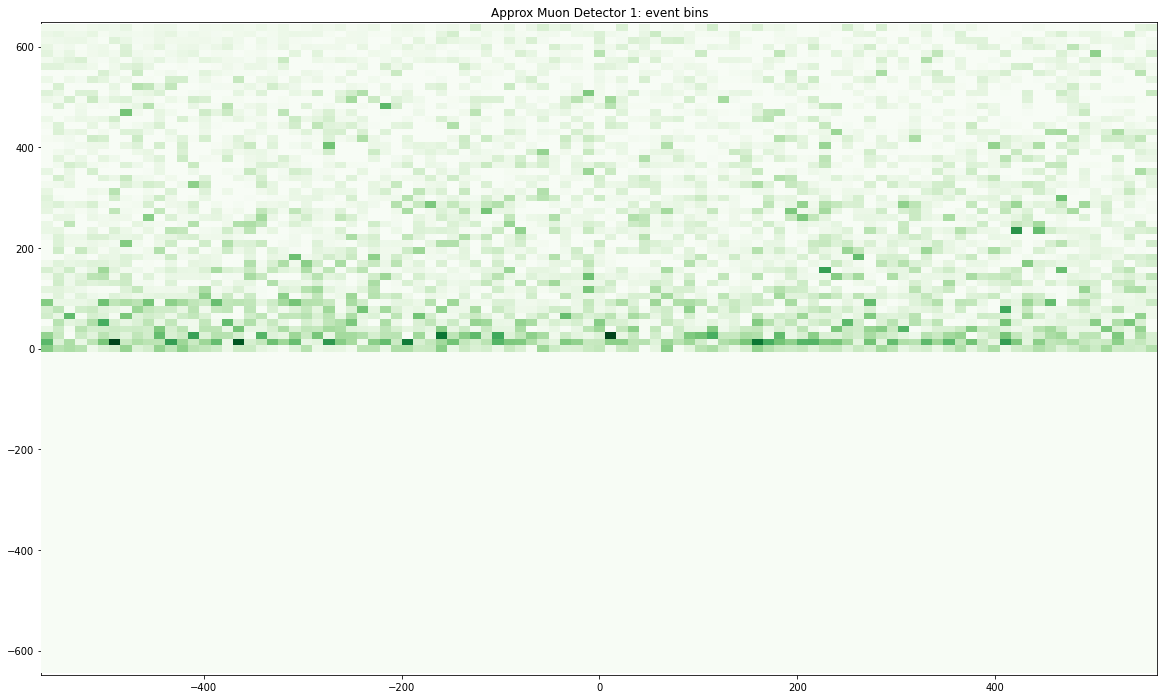

In [20]:
plt.figure(figsize=(20,12))
arr = sim.events_position[sim.mask]
arr2 = sim2.events_position[sim2.mask]

bs = np.linspace(-564, 564, 100)
bs2 = np.linspace(-645, 645, 100)
plt.hist2d(np.append(arr[:, :,2][mask].flatten(),arr2[:, :,2][mask2].flatten()), np.append(arr[:,:,1][mask].flatten(),arr2[:,:,1][mask2].flatten()), alpha = 1, zorder = 10, bins = (bs, bs2), weights = np.append(sim.part_face_counts[sim.mask][mask].flatten(),sim2.part_face_counts[sim2.mask][mask2].flatten()), cmap ='Greens')
plt.xlim(-564, right=564)
plt.ylim(-648, 648)

plt.title("Approx Muon Detector 1: event bins")
plt.savefig("plots_Luc/approx_detector_0_events_bins.jpg", bbox_inches='tight', dpi=300)

In [1]:
(3.6e-6)**2 / 30e-3

4.3199999999999996e-10

In [3]:
import numpy as np
np.sqrt((3.6e-6)**2 + (1.7e-6)**2)

3.981205847478877e-06

In [8]:
print("{:.3e}".format(420e-12 / (np.sqrt((3.6e-6)**2 + (1.7e-6)**2))))

1.055e-04
